##  Categorical Data:
#### Handling missing values,Normalization


In [1]:
#pip install scikit-learn

In [2]:
from sklearn. impute import SimpleImputer

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sb.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
tip=sb.load_dataset('tips')
t=tip.tail(15)
t

,total_bill,tip,sex,smoker,day,time,size
229,22.12,2.88,Female,Yes,Sat,Dinner,2
230,24.01,2.00,Male,Yes,Sat,Dinner,4
231,15.69,3.00,Male,Yes,Sat,Dinner,3
232,11.61,3.39,Male,No,Sat,Dinner,2
233,10.77,1.47,Male,No,Sat,Dinner,2
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3


In [6]:
new_data=t.smoker.map({'Yes':0,'No':1})
new_data

229    0
230    0
231    0
232    1
233    1
234    0
235    1
236    0
237    0
238    1
239    1
240    0
241    0
242    1
243    1
Name: smoker, dtype: category
Categories (2, int64): [0, 1]

In [7]:
t['Code']=new_data
t

C:\Users\Admin\AppData\Local\Temp\ipykernel_16132\2340491727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['Code']=new_data


,total_bill,tip,sex,smoker,day,time,size,Code
229,22.12,2.88,Female,Yes,Sat,Dinner,2,0
230,24.01,2.00,Male,Yes,Sat,Dinner,4,0
231,15.69,3.00,Male,Yes,Sat,Dinner,3,0
232,11.61,3.39,Male,No,Sat,Dinner,2,1
233,10.77,1.47,Male,No,Sat,Dinner,2,1
234,15.53,3.00,Male,Yes,Sat,Dinner,2,0
235,10.07,1.25,Male,No,Sat,Dinner,2,1
236,12.60,1.00,Male,Yes,Sat,Dinner,2,0
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0
238,35.83,4.67,Female,No,Sat,Dinner,3,1


In [8]:
data=pd.DataFrame({'Salary':[30000,30000,100000,45000,'NaN',40000],'Age':[19,'NaN',20,20,21,19]})
data

,Salary,Age
0,30000,19
1,30000,NaN
2,100000,20
3,45000,20
4,NaN,21
5,40000,19


In [9]:
imputers=SimpleImputer(missing_values=np.NaN,strategy='mean')

In [10]:
imputers.fit(data)

SimpleImputer()

In [11]:
i=imputers.transform(data)
i

array([[3.00e+04, 1.90e+01],
       [3.00e+04, 1.98e+01],
       [1.00e+05, 2.00e+01],
       [4.50e+04, 2.00e+01],
       [4.90e+04, 2.10e+01],
       [4.00e+04, 1.90e+01]])

In [12]:
imputer1=SimpleImputer(missing_values=np.NaN,strategy='median')
imputer1.fit(data)

SimpleImputer(strategy='median')

In [13]:
j=imputer1.transform(data)
j

array([[3.0e+04, 1.9e+01],
       [3.0e+04, 2.0e+01],
       [1.0e+05, 2.0e+01],
       [4.5e+04, 2.0e+01],
       [4.0e+04, 2.1e+01],
       [4.0e+04, 1.9e+01]])

In [14]:
imputer2=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
imputer2.fit(data)

SimpleImputer(strategy='most_frequent')

In [15]:
k=imputer2.transform(data)
k

array([[30000, 19],
       [30000, 'NaN'],
       [100000, 20],
       [45000, 20],
       ['NaN', 21],
       [40000, 19]], dtype=object)

In [16]:
imputer3=SimpleImputer(missing_values=np.NaN,strategy='constant')
imputer3.fit(data)

SimpleImputer(strategy='constant')

In [17]:
k1=imputer3.transform(data)
k1

array([[30000, 19],
       [30000, 'NaN'],
       [100000, 20],
       [45000, 20],
       ['NaN', 21],
       [40000, 19]], dtype=object)

##  Normalization

In [18]:
from mpl_toolkits.mplot3d import Axes3D

In [19]:
data1=pd.DataFrame({'x':np.random.randint(-100,100,200),'y':np.random.randint(-50,50,200),'z':np.random.randint(-700,700,200)})
data1

,x,y,z
0,45,-35,4
1,31,43,-681
2,-45,-40,10
3,93,-16,-618
4,61,45,638
...,...,...,...
195,-26,-39,206
196,-69,3,1
197,-10,-44,143
198,-23,11,660


<Figure size 640x480 with 0 Axes>

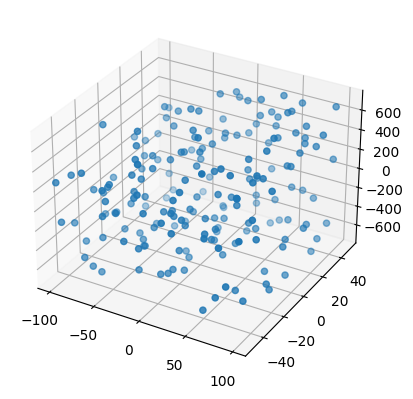

<Figure size 640x480 with 0 Axes>

In [20]:
pl=plt.axes(projection='3d')
pl.scatter3D(data1.x,data1.y,data1.z)
plt.figure()

In [21]:
from sklearn.preprocessing import Normalizer

In [22]:
n=Normalizer()

In [23]:
data2=n.fit_transform(data1)
data2

array([[ 0.78741634, -0.61243493,  0.06999256],
       [ 0.04538401,  0.06295201, -0.99698412],
       [-0.73730873, -0.65538554,  0.16384638],
       [ 0.14876116, -0.02559332, -0.98854191],
       [ 0.0949435 ,  0.07004029,  0.99301565],
       [ 0.0292952 ,  0.08397957, -0.99603676],
       [ 0.23738735,  0.16691298, -0.95696776],
       [-0.09602276, -0.06453988, -0.99328457],
       [-0.12082819, -0.09294476,  0.98831261],
       [-0.1840716 , -0.38348249, -0.90501869],
       [-0.26726124, -0.53452248, -0.80178373],
       [-0.02304863,  0.        , -0.99973435],
       [-0.03042084,  0.06404387, -0.99748331],
       [ 0.12137336, -0.0033253 ,  0.99260135],
       [ 0.23531807,  0.01937913, -0.9717252 ],
       [ 0.26229468,  0.06629426, -0.96270794],
       [ 0.02717583,  0.01811722, -0.99946648],
       [ 0.13719795,  0.00301534, -0.99053906],
       [ 0.21216059,  0.05950846,  0.97542126],
       [-0.62808922,  0.18672923, -0.75540461],
       [ 0.08050531,  0.10350682,  0.991

In [24]:
df=pd.DataFrame(data2,columns=['x1','y1','z1'])
df

,x1,y1,z1
0,0.787416,-0.612435,0.069993
1,0.045384,0.062952,-0.996984
2,-0.737309,-0.655386,0.163846
3,0.148761,-0.025593,-0.988542
4,0.094944,0.070040,0.993016
...,...,...,...
195,-0.123068,-0.184602,0.975078
196,-0.998951,0.043433,0.014478
197,-0.066689,-0.293431,0.953651
198,-0.034823,0.016654,0.999255


<Figure size 640x480 with 0 Axes>

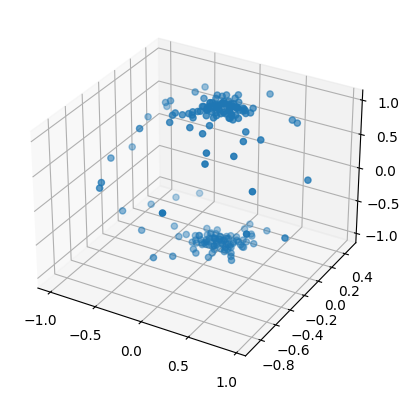

<Figure size 640x480 with 0 Axes>

In [25]:
pl=plt.axes(projection='3d')
pl.scatter3D(df.x1,df.y1,df.z1)
plt.figure()